Assignment-1

Bobomurot Toshboev

In [11]:
# Import all the Libraries required for the Data Analysis
import warnings
warnings.filterwarnings('ignore')

import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Q1. How many observations are in the data?

In [32]:
# Load the dataset
url = "https://raw.githubusercontent.com/sesillim/ai/main/Housing.csv"
data = pd.read_csv(url)
print(data)

print("///////////////////////////////////////////////////////////////////////")

num_obs = data.shape[:]
print(f"The dataset contains {num_obs} observations.")

print("///////////////////////////////////////////////////////////////////////")

print(data.info())

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAS  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

Q2. Build a linear regression model. Print the coefficients of the model and assess the fit.


Y = b0 + b1X
Y = b0 + b1X1 + b2X2 + ... + bpXp

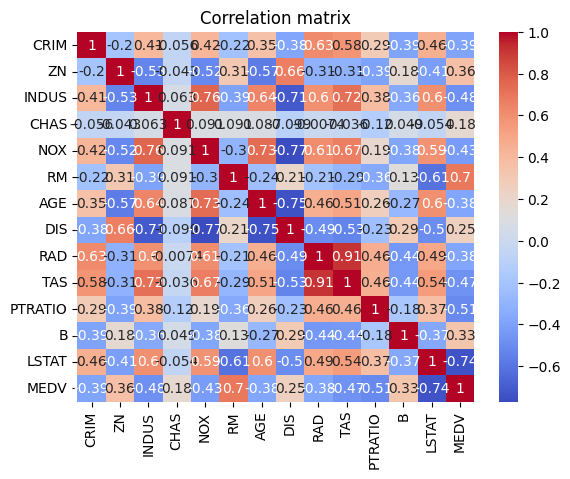

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix =  data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

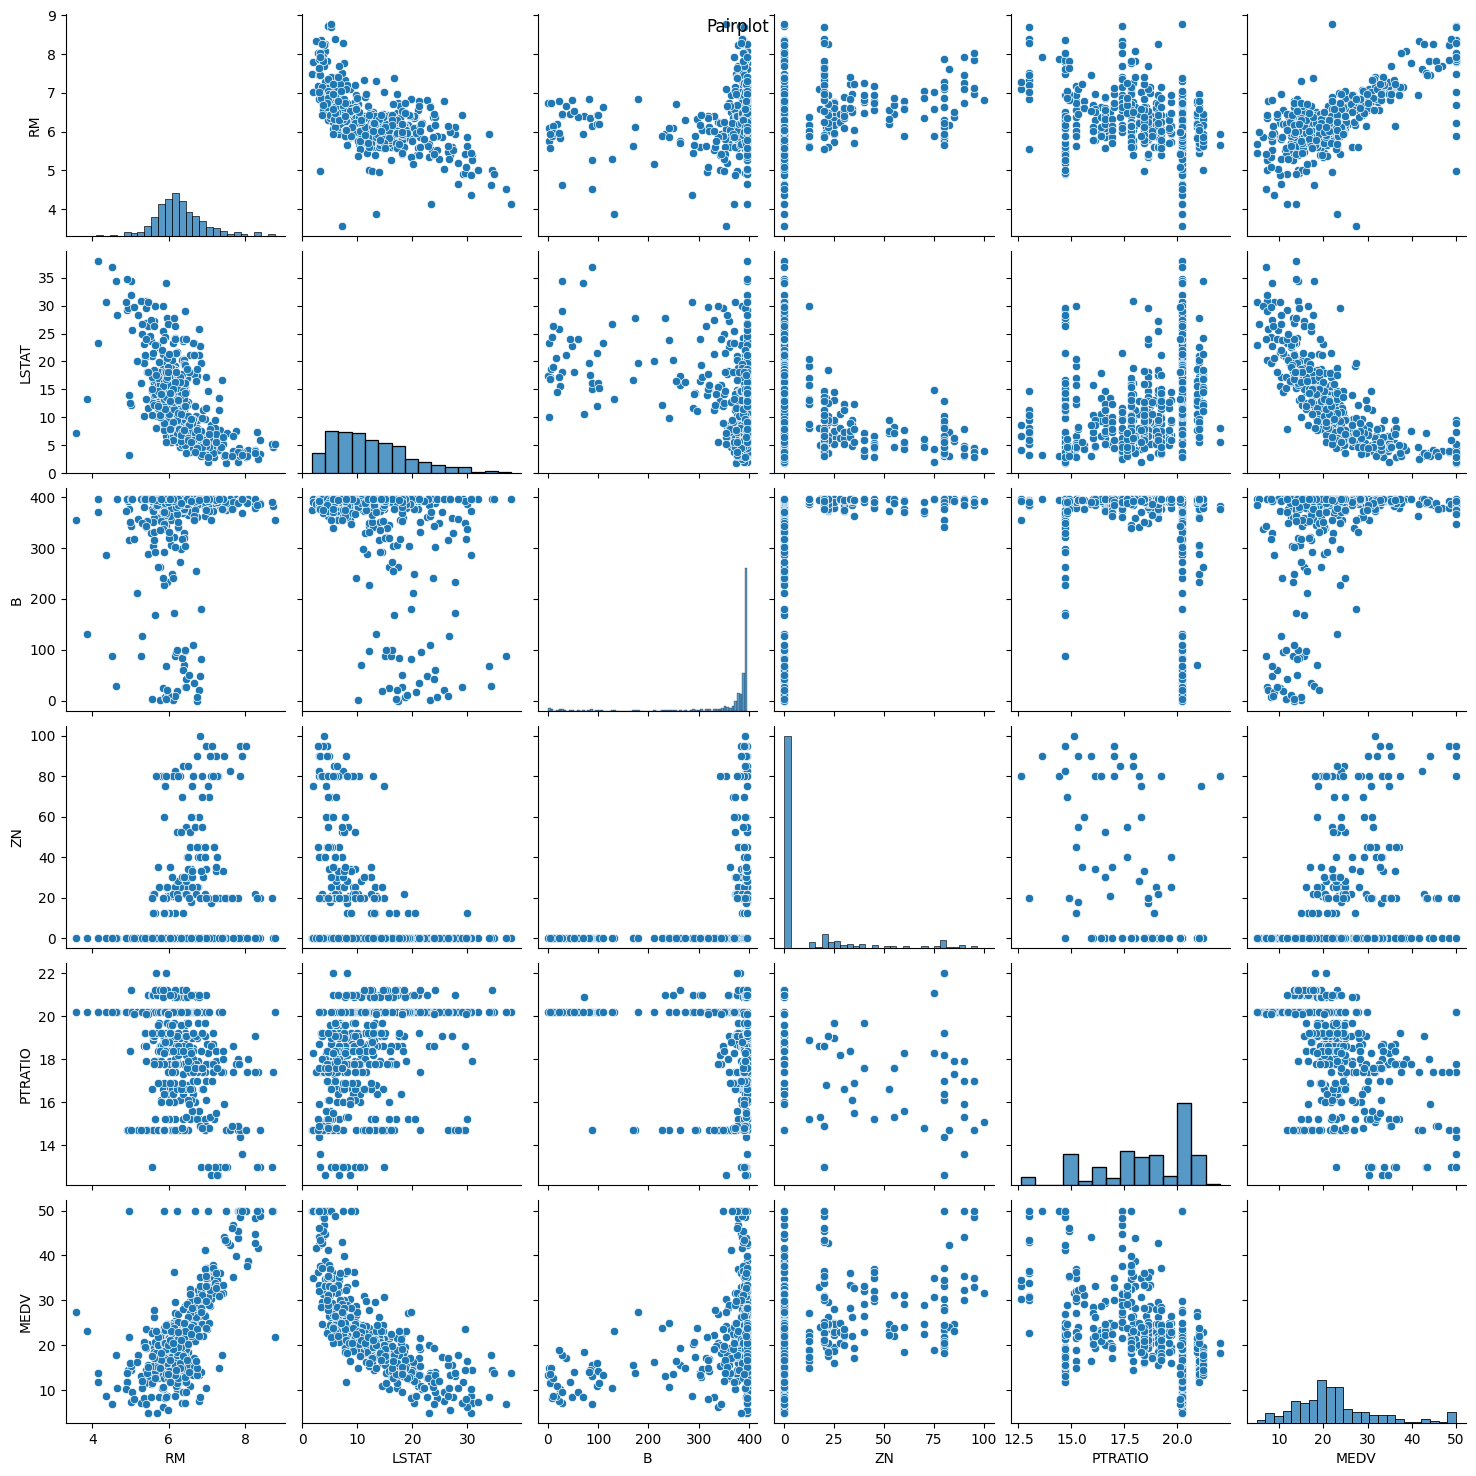

In [34]:
selected_futures = ["RM", 'LSTAT', 'B', 'ZN', 'PTRATIO', 'MEDV']
sns.pairplot(data[selected_futures])
plt.suptitle("Pairplot")
plt.show()

In [35]:
X = data[["RM"]] # input
y = data['MEDV'] # Lable
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the coefficients of the model
coefficients = model.coef_
intercept = model.intercept_

print(f"Mean squared error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared eror: {r2}")
print(f"Coefficients: {coefficients}")

(404, 1) (102, 1)
Mean squared error: 46.144775347317264
Mean absolute error: 4.478335832064149
R-squared eror: 0.3707569232254778
Coefficients: [9.34830141]


Q3. Examine whether the scaling improves the fit of the linear regression model. You can choose any scaling method for the examination.

In [ ]:
# Define a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Train the model on the scaled data
pipeline.fit(X_train, y_train)

In [54]:
# Make predictions on the test set
y_pred_scaled = pipeline.predict(X_test)
# Evaluate the model's performance on the scaled data
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
print("Scaled Mean squared error:", mse_scaled)
print("Scaled R-squared Score:", r2_scaled)

Scaled Mean squared error: 43.472041677202206
Scaled R-squared Score: 0.4679000543136781


Q4. Examine whether implementing L2 regularization with scaling improves model
performance. To optimize the hyperparameter, you have to compare at least 5 different hyperparameter values.



In [59]:
ridge_params = {'ridge__alpha': [0.1, 1, 10, 100, 1000]}

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Perform grid search with cross-validation
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1, 10, 100, 1000]})

In [60]:
y_pred_ridge = ridge_grid.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Good Ridge alpha:", ridge_grid.best_params_)
print("Good Mean Squared Error:", mse_ridge)
print("Goog R-squared Score:", r2_ridge)

Good Ridge alpha: {'ridge__alpha': 10}
Good Mean Squared Error: 43.29462353348566
Goog R-squared Score: 0.47007166119003163


Q5. Examine whether implementing L1 regularization with scaling improves model performance. To optimize the hyperparameter, you have to compare at least 5 different hyperparameter values.

In [61]:
lasso_params = {'lasso__alpha': [0.1, 1, 10, 100, 1000]}
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
y_pred_lasso = lasso_grid.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Good Lasso alpha:", lasso_grid.best_params_)
print("Lasso Mean Squared Error:", mse_lasso)
print("Lasso R-squared Score:", r2_lasso)

Good Lasso alpha: {'lasso__alpha': 0.1}
Lasso Mean Squared Error: 43.357682611458536
Lasso R-squared Score: 0.46929981494886475


FINAL ASSESSMENT